In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
import warnings
from sklearn import datasets
import matplotlib.cbook
from matplotlib import cm

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

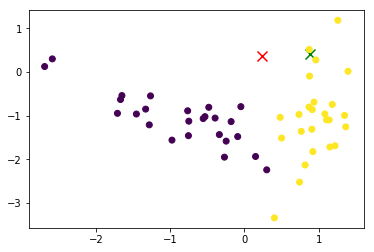

In [90]:
#K-means
def distance(x,mu):
    return np.sqrt((x-mu)@(x-mu).T)
n=50
k=2
R=np.zeros([n,k])
x_train, y_train=datasets.make_classification(n_samples=n, 
                                         n_features=2,
                                         n_informative=2,
                                         n_redundant=0,
                                         n_repeated=0, 
                                         n_classes=k,
                                         n_clusters_per_class=1)
mu1=np.random.randn(2)
mu2=np.random.randn(2)

plt.scatter(mu1[0],mu1[1],color='red',s=100,marker="x")
plt.scatter(mu2[0],mu2[1],color='green',s=100,marker="x")
plt.scatter(x_train[:,0],x_train[:,1],c=1-y_train)
plt.show()

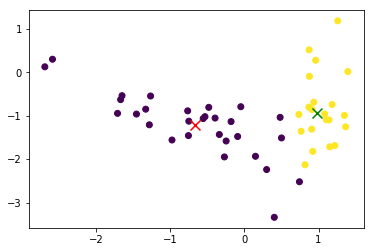

In [96]:
for _ in range(10000):
    for i,item in enumerate(x_train):
        if distance(item,mu1)<distance(item,mu2):
            R[i][0]=1
        else:
            R[i][1]=1 
    mu1=(R[:,0].T@x_train)/np.sum(R[:,0])
    mu2=(R[:,1].T@x_train)/np.sum(R[:,1])
yy=R@np.array([-1,1])
for i,item in enumerate(yy):
    if item==1:
        yy[i]=1
    if item==-1:
        yy[i]=0
plt.scatter(x_train[:,0],x_train[:,1],c=yy)
plt.scatter(mu1[0],mu1[1],color='red',s=100,marker="x")
plt.scatter(mu2[0],mu2[1],color='green',s=100,marker="x")
plt.show()

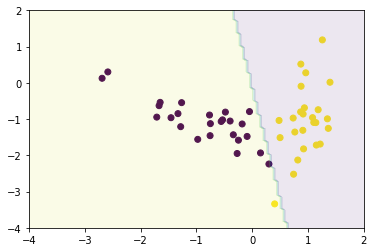

In [95]:
x0, x1 = np.meshgrid(np.linspace(-4, 2, 100), np.linspace(-4, 2, 100))
x = np.array([x0, x1]).reshape(2, -1).T
from scipy.spatial.distance import cdist
D = cdist(x,np.array([mu1,mu2]))
pre=np.zeros(len(D))
for i,item in enumerate(D):
    if item[0]>=item[1]:
        pre[i]=0
    else:
        pre[i]=1
plt.scatter(x_train[:,0],x_train[:,1],c=1-y_train)
plt.contourf(x0, x1, pre.reshape(100, 100), alpha=0.1)
plt.show()

In [640]:
max_iter=1000
num=100
x1 = np.abs(np.random.normal(size=(num, 2))/10)
x1 += np.array([2, 0])
x2 = np.abs(np.random.normal(size=(num, 2))/10)
x2 += np.array([1, 1])
# x3 = np.abs(np.random.normal(size=(num, 2))/10)
# x3 += np.array([0, 5])
# x_train = np.vstack((x1, x2, x3))
x_train = np.vstack((x1, x2))
def gaussian(x,mu,sigma):
    D=2
    expo=-0.5*(x-mu)@np.linalg.inv(sigma)@((x-mu).T)
    div=1/(2*np.pi)**(D/2)/(np.linalg.det(sigma))**0.5
    return div*np.exp(expo)
def EM(x,n_component=2):
    m,n=np.shape(x)
#     mu=[[0.01,0.02],[0.,0],[0.0,0.0]]
    mu=[[0.01,0.02],[0.,0.10]]
    gamma=np.zeros((m,n_component))
    sigma=[[],[]]
    for k in range(n_component):
        sigma[k]=np.eye(n,n)
    pi=[1/2,1/2]
    for _ in range(max_iter):
        for nn in range(m):
            sumgamma=0
            for k in range(n_component):
                gamma[nn][k]=pi[k]*gaussian(x[nn,:],mu[k],sigma[k])
                sumgamma+=gamma[nn][k]
            for k in range(n_component):
                gamma[nn][k]=gamma[nn][k]/sumgamma
        sumGamma = np.sum(gamma, axis=0)
        for k in range(n_component):
            mu[k] = np.zeros((1, n))
            sigma[k] = np.zeros((n, n))
            for j in range(m):
                mu[k] += gamma[j, k] * x[j, :]
            mu[k] /= sumGamma[k] 
            for j in range(m):
                sigma[k] += gamma[j, k] * (x[j, :] - mu[k]).T *(x[j, :] - mu[k])
            sigma[k] /= sumGamma[k] 
            pi[k] = sumGamma[k] / m 
             # print(mu)
    return mu

mu=EM(x_train)


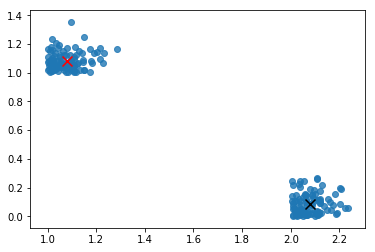

In [641]:
plt.scatter(x_train[:,0],x_train[:,1],alpha=0.8)
plt.scatter(mu[0][0][0],mu[0][0][1],color='red',s=100,marker="x")
plt.scatter(mu[1][0][0],mu[1][0][1],color='black',s=100,marker="x")
# plt.scatter(mu[2][0][0],mu[2][0][1],color='pink',s=100,marker="x")


# plt.scatter(mu2[0],mu2[1],color='green',s=100,marker="x")
plt.show()

In [542]:
#Mixtures of Bernoulli distributions
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")


In [849]:
x = mnist.data
y = mnist.target
x_train = []
for i in [2,3,4]:
    x_train.append(x[np.random.choice(np.where(y == i)[0], 200)])
x_train = np.concatenate(x_train, axis=0)
x_train = (x_train > 127).astype(np.int)
N=np.shape(y)

In [852]:

def fucP(x,mu):
    result=1
    for i in range(len(x)):
        result*=ma.pow(mu[i],x[i])*ma.pow(1-mu[i],1-x[i])
    return result
K=3
D=np.shape(x_train)[0]#600
X=np.shape(x_train)[1]#28**2
def BEM(x,max_iteration=10):
    pi=[1/3,1/3,1/3]
    mu = np.random.uniform(0.25, 0.75, size=(K, X))
    mu = np.random.uniform(0.25, 0.75, size=(K, np.size(x, 1)))
    MU=np.sum(mu,axis=1)  
    for k in range(K):
        mu[k]=mu[k]/MU[k]
    gamma=np.zeros((D,K))
    for _ in range(max_iteration):
        for n in range(D):
            sumgamma=0
            for k in range(K):
                gamma[n][k]=pi[k]*fucP(x[n],mu[k])
                sumgamma+=gamma[n][k]
            if sumgamma==0:
                sumgamma=1e-10
            for k in range(K):
                gamma[n][k]=gamma[n][k]/sumgamma             
        sumGamma = np.sum(gamma, axis=0)
        ssum=np.zeros((K,X))
        for k in range(K):
            for n in range(D):
                ssum[k]+=gamma[n][k]*x[n]
            mu[k]=ssum[k]/sumGamma[k]
            pi[k]=sumGamma[k]/D       
    return mu

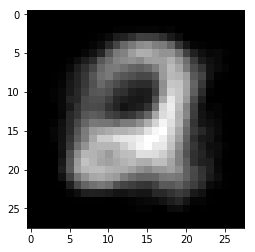

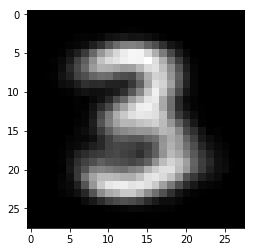

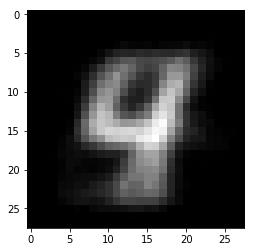

In [853]:
mu=BEM(x_train)
for i in range(len(mu)):
    plt.imshow(mu[i].reshape(28,28),cmap='gray')
    plt.show()